In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import f_oneway, kruskal

In [3]:
import os
# Verificar si el archivo existe en la ruta dada
print(os.path.exists("titanic.csv"))

True


In [4]:
df_titanic = pd.read_csv("titanic.csv")

In [6]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sex          891 non-null    object 
 1   age          891 non-null    float64
 2   sibsp        891 non-null    int64  
 3   parch        891 non-null    int64  
 4   fare         891 non-null    float64
 5   class        891 non-null    object 
 6   who          891 non-null    object 
 7   adult_male   891 non-null    bool   
 8   embark_town  891 non-null    object 
 9   alive        891 non-null    object 
 10  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(2), object(5)
memory usage: 64.5+ KB


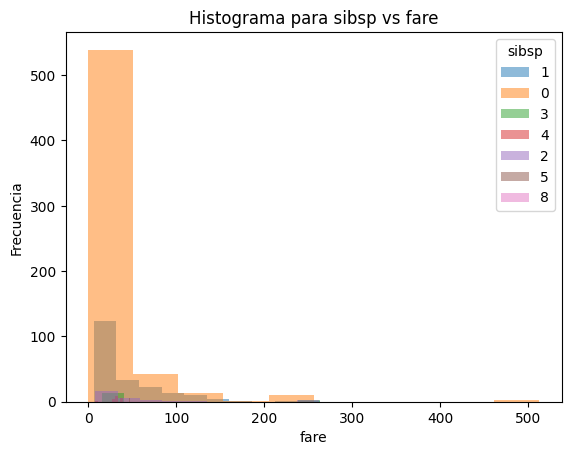

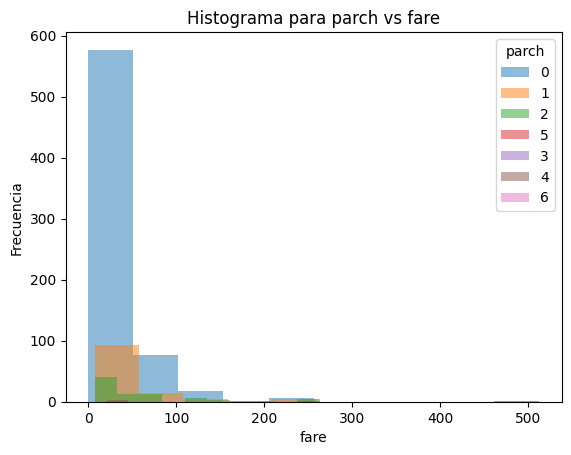

['sibsp', 'parch']

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import f_oneway

def plot_features_cat_regression(df, target_col="", columns=[], p_value=0.05, with_individual_plot=False):
    """
    Parámetros:
    df (pd.DataFrame): DataFrame que contiene las variables.
    target_col (str): Nombre de la columna objetivo (numérica continua).
    columns (list): Lista de columnas categóricas a evaluar.
    p_value (float): Nivel de significancia estadística para el test de relación (por defecto 0.05).
    with_individual_plot (bool): Si es True, genera histogramas por categoría (por defecto False).

    Retorna:
    list: Lista de columnas que pasan el test de relación.
    """
    # Validaciones de entrada
    if not isinstance(df, pd.DataFrame):
        print("Error: El argumento 'df' debe ser un DataFrame de pandas.")
        return None

    if not isinstance(target_col, str) or target_col not in df.columns:
        print("Error: 'target_col' debe ser el nombre de una columna existente en el DataFrame.")
        return None

    if df[target_col].dtype not in ["float64", "float32", "int64", "int32"]:
        print("Error: 'target_col' debe ser una variable numérica continua.")
        return None

    if not isinstance(columns, list):
        print("Error: 'columns' debe ser una lista de nombres de columnas.")
        return None

    if any(col not in df.columns for col in columns):
        print("Error: Algunos nombres en 'columns' no existen en el DataFrame.")
        return None

    if not isinstance(p_value, (float, int)) or not (0 < p_value < 1):
        print("Error: 'p_value' debe ser un número entre 0 y 1.")
        return None

    if not isinstance(with_individual_plot, bool):
        print("Error: 'with_individual_plot' debe ser un valor booleano.")
        return None

    # Asignar columnas si está vacío
    if not columns:
        columns = [col for col in df.columns if col != target_col and df[col].dtype in ["float64", "float32", "int64", "int32"]]

    # Verificar que haya columnas para evaluar
    if not columns:
        print("No hay columnas numéricas para evaluar.")
        return []

    significant_columns = []

    # Evaluar relación entre columnas y target_col
    for col in columns:
        try:
            # Crear grupos por categoría
            groups = [df[df[col] == categoria][target_col].dropna() for categoria in df[col].unique()]
            
            # Validar que haya más de un grupo
            if len(groups) > 1:
                _, p = f_oneway(*groups)  # Test ANOVA
                if p < p_value:
                    significant_columns.append(col)
                    
                    # Generar histogramas si se solicita
                    if with_individual_plot:
                        for categoria in df[col].unique():
                            subset = df[df[col] == categoria][target_col]
                            plt.hist(subset, alpha=0.5, label=str(categoria))
                        
                        plt.title(f"Histograma para {col} vs {target_col}")
                        plt.xlabel(target_col)
                        plt.ylabel("Frecuencia")
                        plt.legend(title=col)
                        plt.show()
        except Exception as e:
            print(f"Error al analizar la columna '{col}': {e}")

    # Mensaje si no hay columnas significativas
    if not significant_columns:
        print("No se encontraron columnas significativas.")

    return significant_columns

plot_features_cat_regression(df = df_titanic, target_col= "fare", p_value=0.05, with_individual_plot= True)